In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.stattools import adfuller

### Data Loading

In [2]:
# Loading Data set
bitcoin_df = pd.read_csv("C:/Clarkson/Sem 2/ML/Project/Bitcoin Historical Data (1).csv")

In [3]:
# Check the first few rows of the dataset to understand its structure
bitcoin_df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,04/21/2025,"87,510.30","85,179.00","87,677.30","85,148.80",59.62K,2.74%
1,04/20/2025,"85,179.00","85,075.50","85,321.00","83,976.10",32.08K,0.13%
2,04/19/2025,"85,068.10","84,472.40","85,604.30","84,366.50",32.07K,0.70%
3,04/18/2025,"84,474.60","84,947.70","85,106.10","84,331.00",25.83K,-0.55%
4,04/17/2025,"84,940.00","84,032.20","85,467.30","83,786.20",49.28K,1.08%


In [4]:
# Checking DataSet Structure
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3399 entries, 0 to 3398
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      3399 non-null   object
 1   Price     3399 non-null   object
 2   Open      3399 non-null   object
 3   High      3399 non-null   object
 4   Low       3399 non-null   object
 5   Vol.      3399 non-null   object
 6   Change %  3399 non-null   object
dtypes: object(7)
memory usage: 186.0+ KB


### Data Cleaning Process

In [5]:
# Ensure 'Date' column is in datetime format
bitcoin_df['Date'] = pd.to_datetime(bitcoin_df['Date'], errors='coerce')

# Remove non-numeric characters from 'Price', 'Vol.', and 'Change %' and convert them to numeric
bitcoin_df['Price'] = bitcoin_df['Price'].replace({'\$': '', ',': '', 'K': 'e3', 'M': 'e6', 'B': 'e9'}, regex=True)
bitcoin_df['Vol.'] = bitcoin_df['Vol.'].replace({'\$': '', ',': '', 'K': 'e3', 'M': 'e6', 'B': 'e9'}, regex=True)
bitcoin_df['Change %'] = bitcoin_df['Change %'].replace({'%': '', ',': ''}, regex=True)

# Convert to numeric
bitcoin_df['Price'] = pd.to_numeric(bitcoin_df['Price'], errors='coerce')
bitcoin_df['Vol.'] = pd.to_numeric(bitcoin_df['Vol.'], errors='coerce')
bitcoin_df['Change %'] = pd.to_numeric(bitcoin_df['Change %'], errors='coerce')

# Check for any NaN values after cleaning
print(bitcoin_df.isnull().sum())

Date        1344
Price          0
Open           0
High           0
Low            0
Vol.           0
Change %       0
dtype: int64


<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Lokeshsaroj\AppData\Local\Temp\ipykernel_13164\1540105050.py:5: SyntaxWarning: invalid escape sequence '\$'
  bitcoin_df['Price'] = bitcoin_df['Price'].replace({'\$': '', ',': '', 'K': 'e3', 'M': 'e6', 'B': 'e9'}, regex=True)
C:\Users\Lokeshsaroj\AppData\Local\Temp\ipykernel_13164\1540105050.py:6: SyntaxWarning: invalid escape sequence '\$'
  bitcoin_df['Vol.'] = bitcoin_df['Vol.'].replace({'\$': '', ',': '', 'K': 'e3', 'M': 'e6', 'B': 'e9'}, regex=True)


In [6]:
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3399 entries, 0 to 3398
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      2055 non-null   datetime64[ns]
 1   Price     3399 non-null   float64       
 2   Open      3399 non-null   object        
 3   High      3399 non-null   object        
 4   Low       3399 non-null   object        
 5   Vol.      3399 non-null   float64       
 6   Change %  3399 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 186.0+ KB


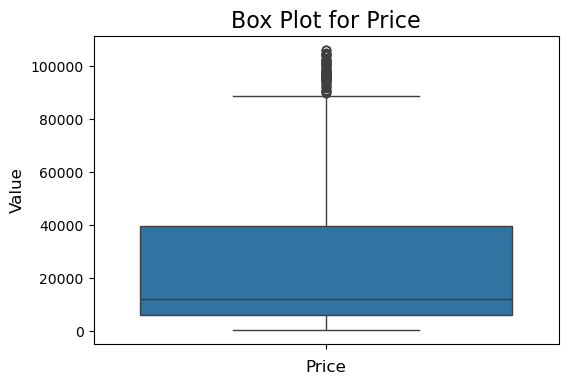

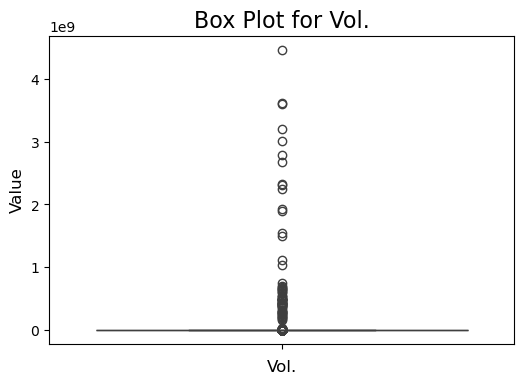

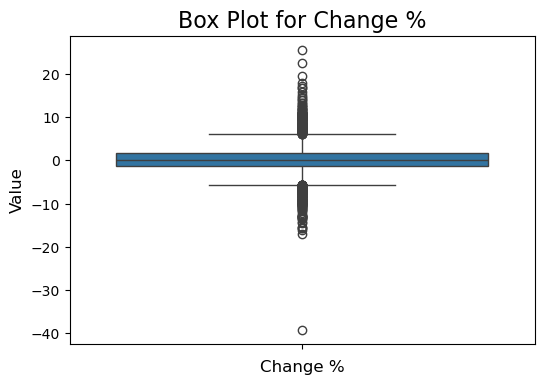

In [7]:
# List of columns to plot a box plot
columns_to_plot = ['Price', 'Vol.', 'Change %']

# Create separate box plots for each column
for col in columns_to_plot:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=bitcoin_df[col])
    plt.title(f'Box Plot for {col}', fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Value', fontsize=12)
    plt.show()

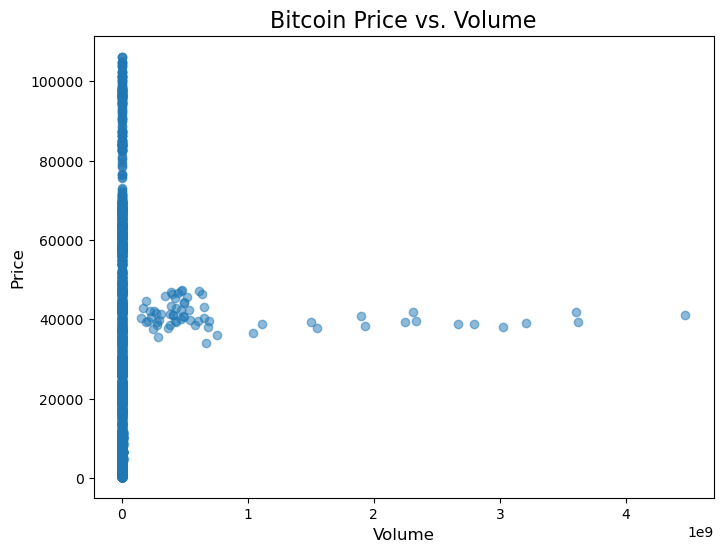

In [8]:
# Plot a scatter plot between Price and Volume
plt.figure(figsize=(8, 6))
plt.scatter(bitcoin_df['Vol.'], bitcoin_df['Price'], alpha=0.5)
plt.title('Bitcoin Price vs. Volume', fontsize=16)
plt.xlabel('Volume', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

In [9]:
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3399 entries, 0 to 3398
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      2055 non-null   datetime64[ns]
 1   Price     3399 non-null   float64       
 2   Open      3399 non-null   object        
 3   High      3399 non-null   object        
 4   Low       3399 non-null   object        
 5   Vol.      3399 non-null   float64       
 6   Change %  3399 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 186.0+ KB


In [10]:
# Dropping rows with NaN values
bitcoin_df = bitcoin_df.dropna()

In [11]:
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2055 entries, 0 to 3386
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      2055 non-null   datetime64[ns]
 1   Price     2055 non-null   float64       
 2   Open      2055 non-null   object        
 3   High      2055 non-null   object        
 4   Low       2055 non-null   object        
 5   Vol.      2055 non-null   float64       
 6   Change %  2055 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 128.4+ KB


In [12]:
# Setting the 'Date' column as the index
bitcoin_df.set_index('Date', inplace=True)

In [13]:
# Splitting the data into training and testing sets (80% train, 20% test)
train_size = int(len(bitcoin_df) * 0.8)
train, test = bitcoin_df['Price'].iloc[:train_size], bitcoin_df['Price'].iloc[train_size:]

In [14]:
train.index.max()

Timestamp('2025-04-21 00:00:00')

In [15]:
test.index.min()

Timestamp('2016-01-13 00:00:00')

In [16]:
# Fitting the ARIMA model (starting with ARIMA(1, 0, 0)) as basic one
model = ARIMA(train, order=(1, 0, 0))
model_fit = model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1644
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -14446.695
Date:                Wed, 07 May 2025   AIC                          28899.391
Time:                        20:06:45   BIC                          28915.605
Sample:                             0   HQIC                         28905.403
                               - 1644                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.039e+04   7560.045      4.020      0.000    1.56e+04    4.52e+04
ar.L1          0.9987      0.001   1300.833      0.000       0.997       1.000
sigma2      2.499e+06   1.95e+04    127.918      0.0

C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\L

C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


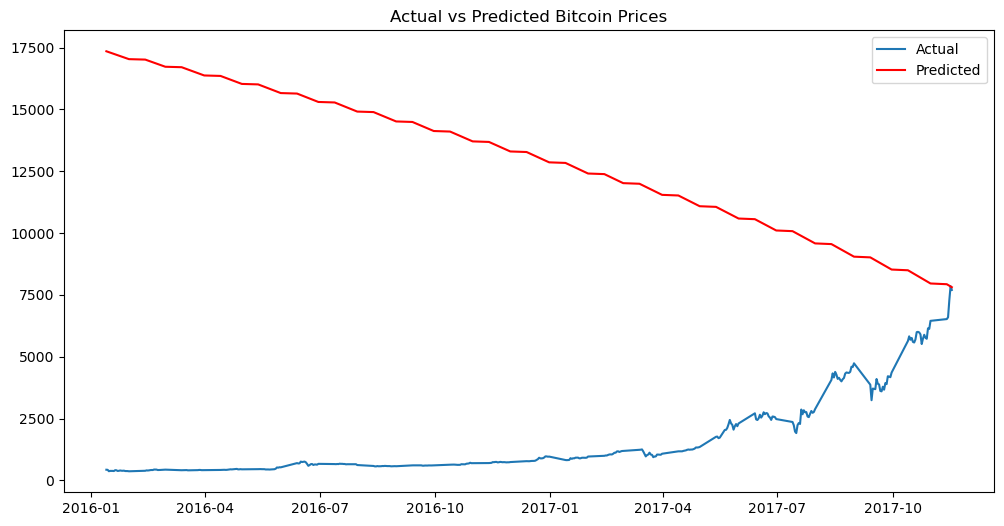

In [17]:
# Checking predictions as per our model
predictions = model_fit.forecast(steps=len(test))

# Plotting the actual vs predicted values for bitcoin based on our model
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, predictions, label='Predicted', color='red')
plt.title('Actual vs Predicted Bitcoin Prices')
plt.legend()
plt.show()

In [18]:
# Calculating RMSE tocheck our model performance
rmse = np.sqrt(mean_squared_error(test, predictions))
print(f"RMSE for ARIMA(1, 0, 0): {rmse}")

RMSE for ARIMA(1, 0, 0): 12201.665547836668


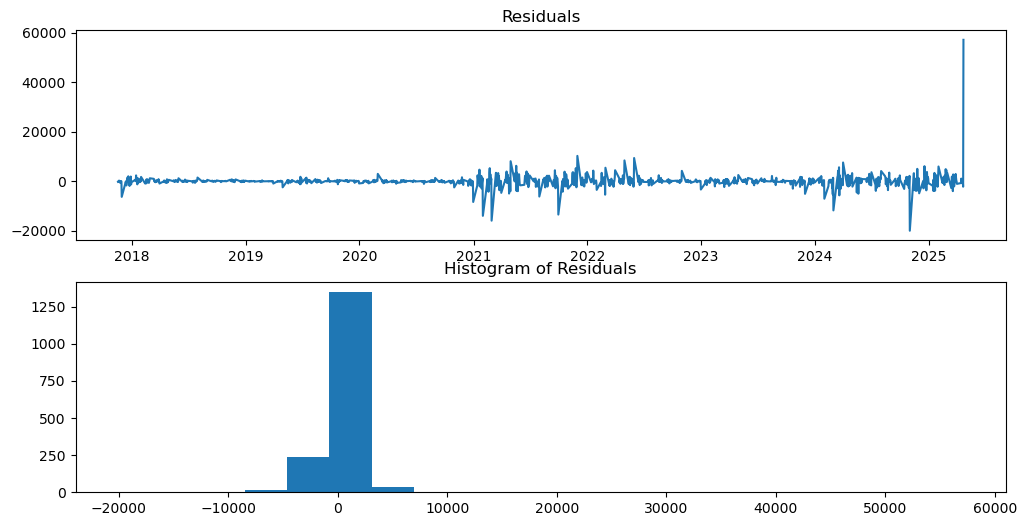

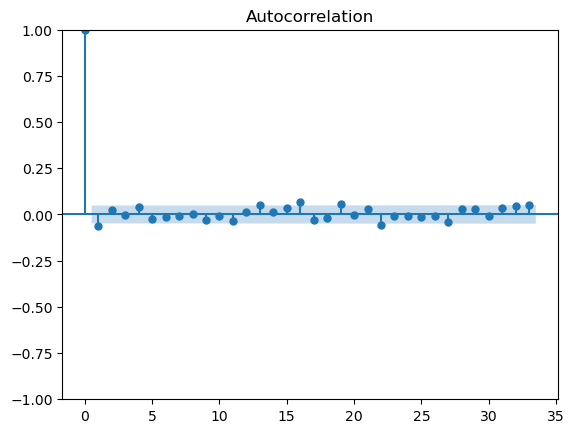

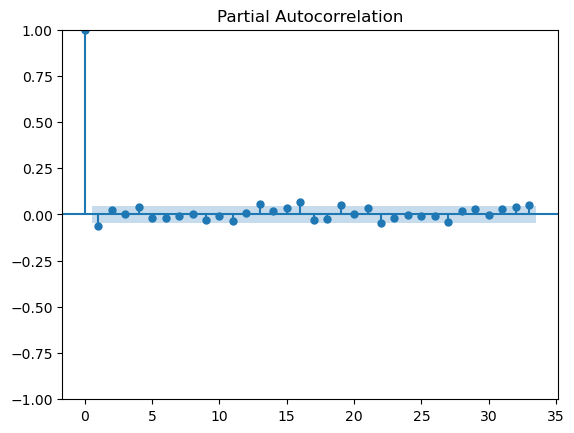

In [19]:
# Checking the residuals
residuals = model_fit.resid

# Plot the residuals
plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.plot(residuals)
plt.title('Residuals')
plt.subplot(212)
plt.hist(residuals, bins=20)
plt.title('Histogram of Residuals')
plt.show()

# ACF/PACF plot of residuals
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(residuals)
plot_pacf(residuals)
plt.show()

In [20]:
# Create lag features
bitcoin_df['lag_1'] = bitcoin_df['Price'].shift(1)
bitcoin_df['lag_2'] = bitcoin_df['Price'].shift(2)

# Drop initial NaN values created by shifting
bitcoin_df.dropna(inplace=True)

In [21]:
# Optional: Sort by date
bitcoin_df.sort_index(inplace=True)

# Define train and test ranges by date
train = bitcoin_df.loc[:'2022-12-31']
test = bitcoin_df.loc['2023-01-01':]

# Create X (lag features) and y (target) for train/test
X_train = train[['lag_1', 'lag_2']]
X_test = test[['lag_1', 'lag_2']]
y_train = train['Price']
y_test = test['Price']

In [22]:
y_train.head()

Date
2016-01-13    432.2
2016-01-14    429.1
2016-01-15    372.3
2016-01-16    385.0
2016-01-17    382.5
Name: Price, dtype: float64

In [23]:
X_train.head()

,lag_1,lag_2
Date,,
2016-01-13,429.1,372.3
2016-01-14,372.3,385.0
2016-01-15,385.0,382.5
2016-01-16,382.5,384.4
2016-01-17,384.4,379.5


In [24]:
print("Train Range:", train.index.min().date(), "to", train.index.max().date())
print("Test Range:", test.index.min().date(), "to", test.index.max().date())

Train Range: 2016-01-13 to 2022-12-31
Test Range: 2023-01-13 to 2025-04-19


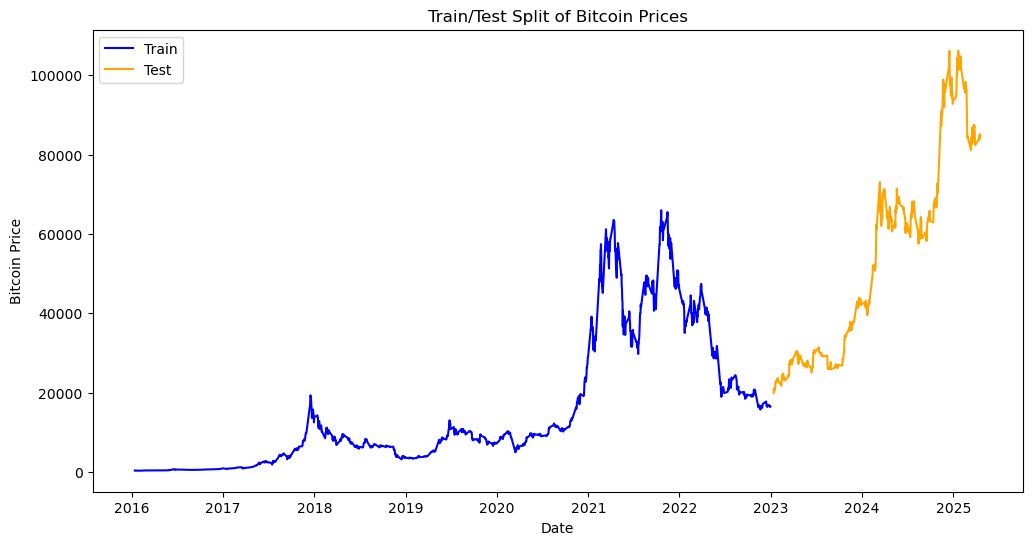

In [25]:
# Plotting Train and test data split
plt.figure(figsize=(12, 6))
plt.plot(train.index, y_train, label='Train', color='blue')
plt.plot(test.index, y_test, label='Test', color='orange')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.title('Train/Test Split of Bitcoin Prices')
plt.legend()
plt.show()

In [26]:
model = ARIMA(y_train, exog=X_train, order=(1, 0, 0))
model_fit = model.fit()

# Model summary
print(model_fit.summary())

C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1549
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -13215.783
Date:                Wed, 07 May 2025   AIC                          26441.565
Time:                        20:06:46   BIC                          26468.292
Sample:                             0   HQIC                         26451.506
                               - 1549                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.4783    104.428      0.225      0.822    -181.197     228.154
lag_1          0.9523      0.016     58.349      0.000       0.920       0.984
lag_2          0.0453      0.017      2.735      0.0

In [27]:
# Convert necessary columns
bitcoin_df = bitcoin_df.apply(pd.to_numeric, errors='coerce')

# Prepare data for Model
y_train = bitcoin_df['Price'].iloc[:train_size]
X_train = bitcoin_df[['lag_1', 'lag_2']].iloc[:train_size]

# Fitting Model ARIMA
model = ARIMA(y_train, exog=X_train, order=(1, 0, 0))
model_fit = model.fit()

C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [28]:
# Define parameter ranges
p_values = range(0, 4)
d_values = range(0, 2)
q_values = range(0, 4)

best_aic = float("inf")
best_order = None
best_model = None

for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                model = ARIMA(y_train, exog=X_train, order=(p, d, q))
                model_fit = model.fit()
                if model_fit.aic < best_aic:
                    best_aic = model_fit.aic
                    best_order = (p, d, q)
                    best_model = model_fit
                print(f'ARIMA{(p,d,q)} AIC: {model_fit.aic}')
            except:
                continue

print(f"\n✅ Best ARIMA model: {best_order} with AIC = {best_aic}")

C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 0) AIC: 27999.67449305171
ARIMA(0, 0, 1) AIC: 28001.677520667683
ARIMA(0, 0, 2) AIC: 28002.963642764305


C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasti

ARIMA(0, 0, 3) AIC: 28004.96722524769


C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 0) AIC: 27983.047244949757
ARIMA(0, 1, 1) AIC: 27985.052061812385


C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasti

ARIMA(0, 1, 2) AIC: 27979.82569759135


C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 3) AIC: 27981.780024263888
ARIMA(1, 0, 0) AIC: 28001.672871453437


C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasti

ARIMA(1, 0, 1) AIC: 28002.806294284735


C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 2) AIC: 28004.66542318136


C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 3) AIC: 28005.990452079262
ARIMA(1, 1, 0) AIC: 27985.047497570027
ARIMA(1, 1, 1) AIC: 27987.05203335214


C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasti

ARIMA(1, 1, 2) AIC: 27976.238374487068


C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization fail

ARIMA(1, 1, 3) AIC: 27979.50740006499
ARIMA(2, 0, 0) AIC: 28002.836373751794


C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 1) AIC: 28004.07626655323


C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 2) AIC: 27998.761978179587


C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 3) AIC: 28000.816359948883


C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 0) AIC: 27979.06080668918


C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary st

ARIMA(2, 1, 1) AIC: 27976.489739705205


C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 2) AIC: 27977.463720291293


C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization fail

ARIMA(2, 1, 3) AIC: 27966.662847565087
ARIMA(3, 0, 0) AIC: 28004.828681271953


C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(3, 0, 1) AIC: 28006.83105749409


C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(3, 0, 2) AIC: 28000.77282942843


C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary st

ARIMA(3, 0, 3) AIC: 28010.884500417513


C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(3, 1, 0) AIC: 27980.29254264338


C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization fail

ARIMA(3, 1, 1) AIC: 27978.737312718993


C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates

ARIMA(3, 1, 2) AIC: 27979.359179460167
ARIMA(3, 1, 3) AIC: 27979.651615047253

✅ Best ARIMA model: (2, 1, 3) with AIC = 27966.662847565087


C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


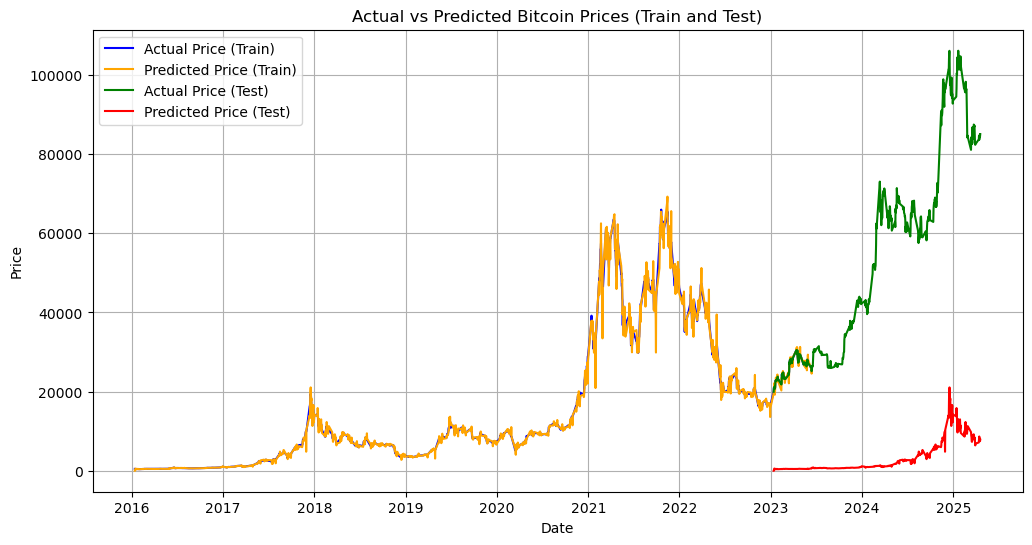

In [29]:
# Train predictions (if not already done)
train_predictions = best_model.predict(n_periods=len(X_train), X=X_train)

# Test predictions (assuming you've already forecasted these)
test_predictions = best_model.predict(n_periods=len(X_test), X=X_test)

# Ensure the predictions have the same length as the actual test data
test_predictions = test_predictions[:len(y_test)]

# Plotting both training and test data
plt.figure(figsize=(12, 6))

# Plotting actual training and predicted training prices
plt.plot(y_train.index, y_train, label='Actual Price (Train)', color='blue')
plt.plot(y_train.index, train_predictions, label='Predicted Price (Train)', color='orange')

# Plotting actual test and predicted test prices
plt.plot(y_test.index, y_test, label='Actual Price (Test)', color='green')
plt.plot(y_test.index, test_predictions, label='Predicted Price (Test)', color='red')

# Adding title and labels
plt.title('Actual vs Predicted Bitcoin Prices (Train and Test)')
plt.xlabel('Date')
plt.ylabel('Price')

# Showing legend and grid
plt.legend()
plt.grid(True)

# Displaying the plot
plt.show()


In [30]:
print(test_predictions.head())
print(y_test.head())

Date
2016-01-13    -29.069629
2016-01-14    164.620896
2016-01-15    453.583718
2016-01-16    530.597857
2016-01-17    452.075261
Name: predicted_mean, dtype: float64
Date
2023-01-13    19927.0
2023-01-14    20958.2
2023-01-15    20879.8
2023-01-16    21184.2
2023-01-17    21137.1
Name: Price, dtype: float64


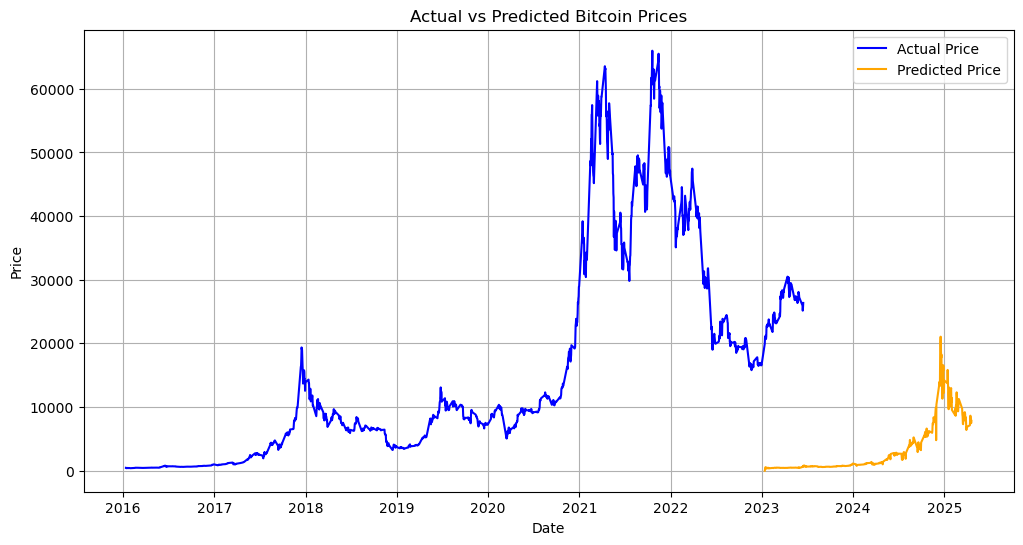

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(y_train.index, y_train, label='Actual Price', color='blue')
plt.plot(y_test.index, test_predictions, label='Predicted Price', color='orange')
plt.title('Actual vs Predicted Bitcoin Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [32]:

rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
mae = mean_absolute_error(y_test, test_predictions)

print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')

RMSE: 55045.37
MAE: 50475.75


In [33]:


result = adfuller(bitcoin_df['Price'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

if result[1] > 0.05:
    print("Non-stationary: consider differencing")
else:
    print("Stationary: proceed with ARIMA/SARIMA")

ADF Statistic: -0.5583584408601926
p-value: 0.880116474636425
Non-stationary: consider differencing


In [34]:
print(bitcoin_df.columns)

Index(['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %', 'lag_1', 'lag_2'], dtype='object')


In [35]:
# Fit the ARIMA model
model = ARIMA(y_train, exog=X_train, order=(1, 0, 0))  # ARIMA(1, 0, 0) with exogenous variables (lag features)
model_fit = model.fit()

# Output model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1644
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -13995.836
Date:                Wed, 07 May 2025   AIC                          28001.673
Time:                        20:07:14   BIC                          28028.697
Sample:                             0   HQIC                         28011.694
                               - 1644                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.8544     98.395      0.232      0.816    -169.995     215.704
lag_1          0.9503      0.016     60.598      0.000       0.920       0.981
lag_2          0.0472      0.016      2.969      0.0

C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


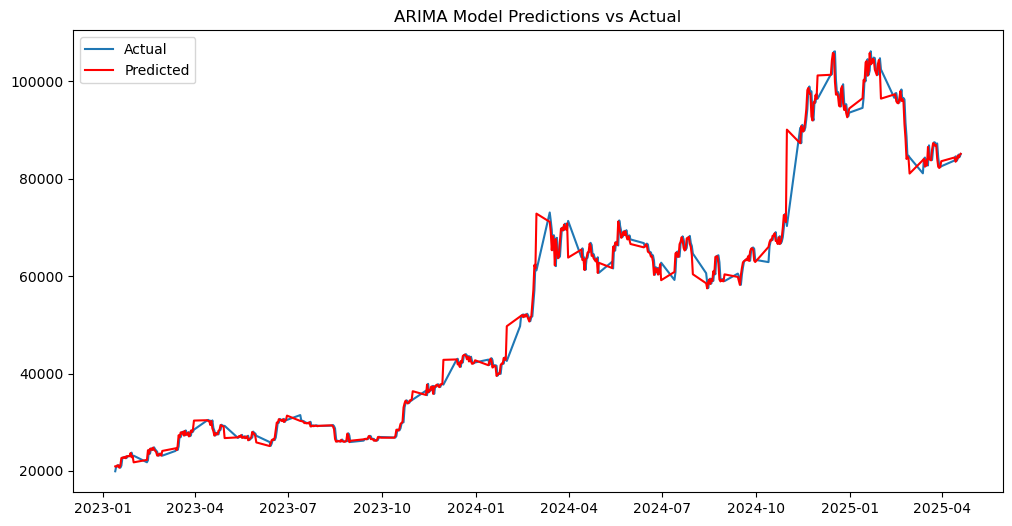

In [36]:
# Make predictions on the test data
predictions = model_fit.forecast(steps=len(y_test), exog=X_test)

# Plot the predictions vs actual values

plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, predictions, label='Predicted', color='red')
plt.title('ARIMA Model Predictions vs Actual')
plt.legend()
plt.show()

In [37]:
# ADF Test on y_train (Ensure y_train is a series)
result_y = adfuller(y_train)
print(f"ADF Statistic for y_train: {result_y[0]}")
print(f"p-value for y_train: {result_y[1]}")

# ADF Test on each column of X_train (Exogenous variables)
for col in X_train.columns:
    result_X = adfuller(X_train[col])
    print(f"ADF Statistic for {col}: {result_X[0]}")
    print(f"p-value for {col}: {result_X[1]}")

ADF Statistic for y_train: -1.8533325885175953
p-value for y_train: 0.3543230747042492
ADF Statistic for lag_1: -1.8523172355783186
p-value for lag_1: 0.35481404150524953
ADF Statistic for lag_2: -1.8499214686723162
p-value for lag_2: 0.35597356923395584


C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


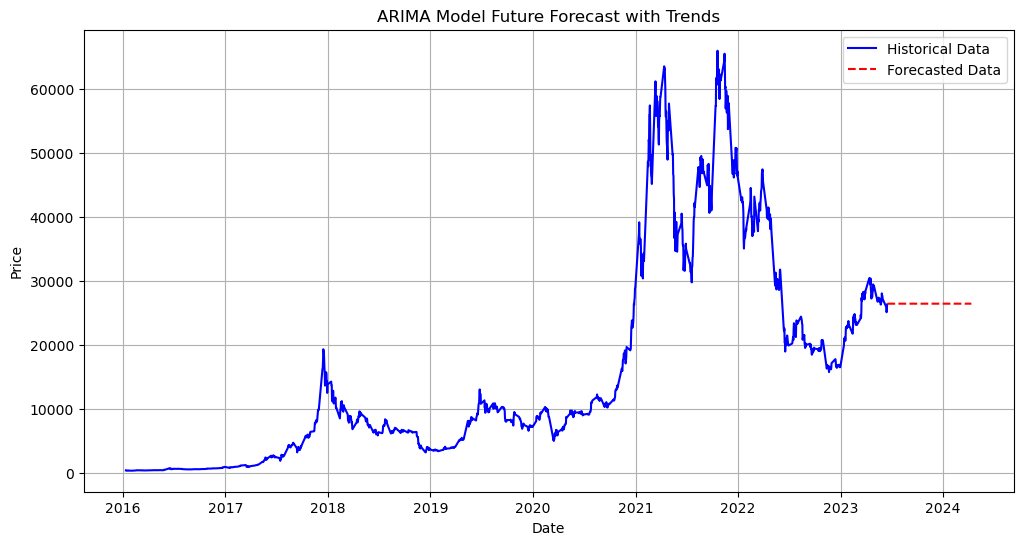

In [38]:
# Number of periods to forecast
n_periods = 300  

# Use X_train instead of X_test for future exogenous variable predictions
last_values = X_train.iloc[-1].values  # Last value from training data for exogenous variables

# Assuming no change in exogenous variables for simplicity (you can model them separately if needed)
future_exog = np.tile(last_values, (n_periods, 1))

# Forecasting using the ARIMA model
forecast = model_fit.forecast(steps=n_periods, exog=future_exog)

# Creating a date range for the forecasted periods
last_date = y_train.index[-1]
forecast_index = pd.date_range(start=last_date, periods=n_periods + 1, freq='D')[1:]

# Plot the historical and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(y_train.index, y_train, label='Historical Data', color='blue')
plt.plot(forecast_index, forecast, label='Forecasted Data', color='red', linestyle='--')
plt.title('ARIMA Model Future Forecast with Trends')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

In [39]:
predictions

1644    20924.536351
1645    20864.531783
1646    21151.576517
1647    21084.799985
1648    20660.870283
            ...     
2143    83886.652816
2144    84727.358095
2145    84313.106266
2146    84882.336404
2147    85097.756559
Name: predicted_mean, Length: 504, dtype: float64

In [40]:
print(y_test.head())
print(predictions.head())

Date
2023-01-13    19927.0
2023-01-14    20958.2
2023-01-15    20879.8
2023-01-16    21184.2
2023-01-17    21137.1
Name: Price, dtype: float64
1644    20924.536351
1645    20864.531783
1646    21151.576517
1647    21084.799985
1648    20660.870283
Name: predicted_mean, dtype: float64


In [41]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'RMSE for ARIMA model: {rmse}')

RMSE for ARIMA model: 1863.7597452552154


In [42]:
# Remove commas from the 'Price' column and convert it to numeric
bitcoin_df['Price'] = bitcoin_df['Price'].replace({',': ''}, regex=True)

# Convert the 'Price' column to float
bitcoin_df['Price'] = pd.to_numeric(bitcoin_df['Price'], errors='coerce')

# Check for any NaN values after conversion
print(bitcoin_df['Price'].head())

Date
2016-01-13    432.2
2016-01-14    429.1
2016-01-15    372.3
2016-01-16    385.0
2016-01-17    382.5
Name: Price, dtype: float64


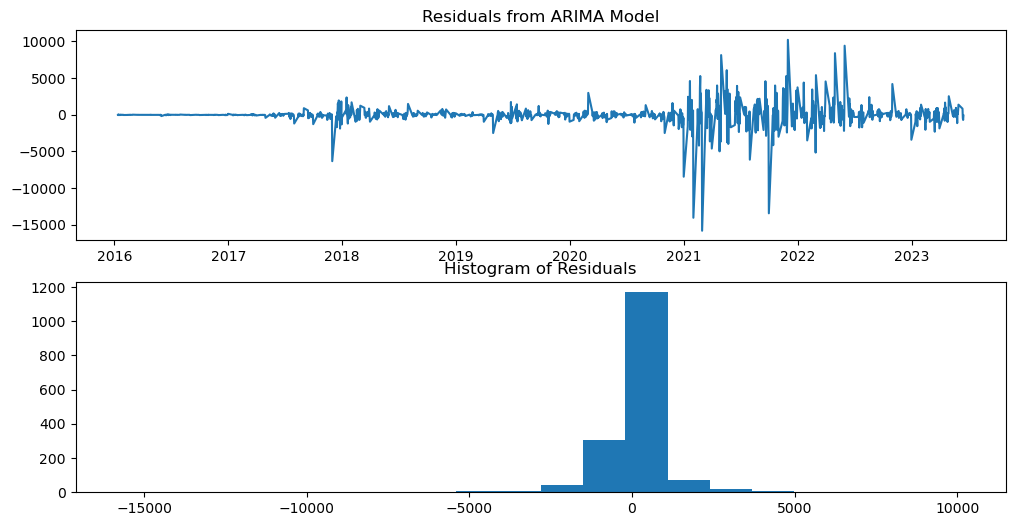

In [44]:
# Residuals plot
residuals = model_fit.resid

plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.plot(residuals)
plt.title('Residuals from ARIMA Model')

plt.subplot(212)
plt.hist(residuals, bins=20)
plt.title('Histogram of Residuals')

plt.show()

In [45]:
# Make predictions on the test data
predictions = model_fit.forecast(steps=len(y_test), exog=X_test)

# Output the predictions for the test dataset
print(f"Predictions for Bitcoin Price:\n{predictions}")

Predictions for Bitcoin Price:
1644    20924.536351
1645    20864.531783
1646    21151.576517
1647    21084.799985
1648    20660.870283
            ...     
2143    83886.652816
2144    84727.358095
2145    84313.106266
2146    84882.336404
2147    85097.756559
Name: predicted_mean, Length: 504, dtype: float64


C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


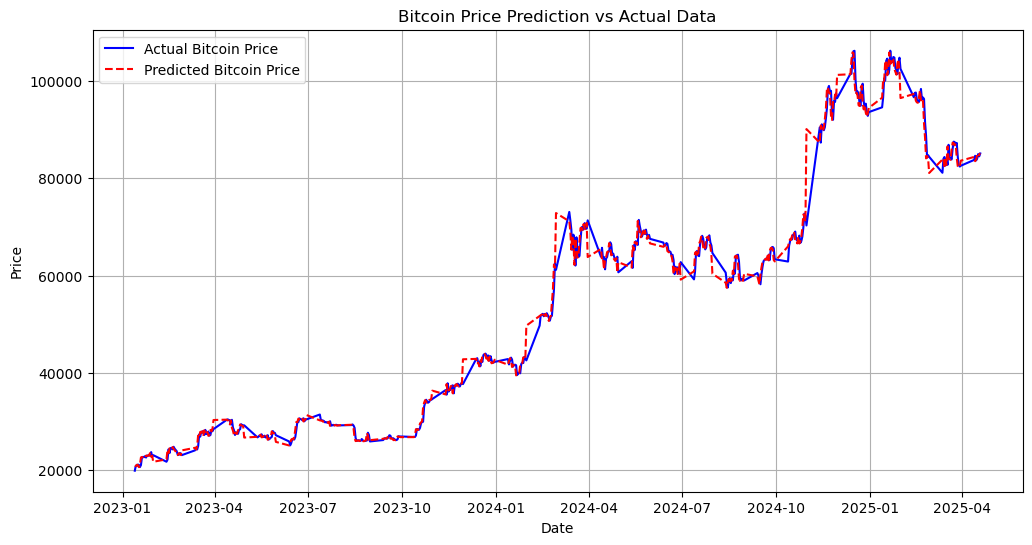

In [46]:
# Make predictions using the fitted model
predictions = model_fit.forecast(steps=len(y_test), exog=X_test)

# Create a date range for the test data predictions
test_dates = y_test.index

# Plot the actual Bitcoin price (y_test) and the predicted values
plt.figure(figsize=(12, 6))
plt.plot(test_dates, y_test, label='Actual Bitcoin Price', color='blue')
plt.plot(test_dates, predictions, label='Predicted Bitcoin Price', color='red', linestyle='--')

# Add titles and labels
plt.title('Bitcoin Price Prediction vs Actual Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


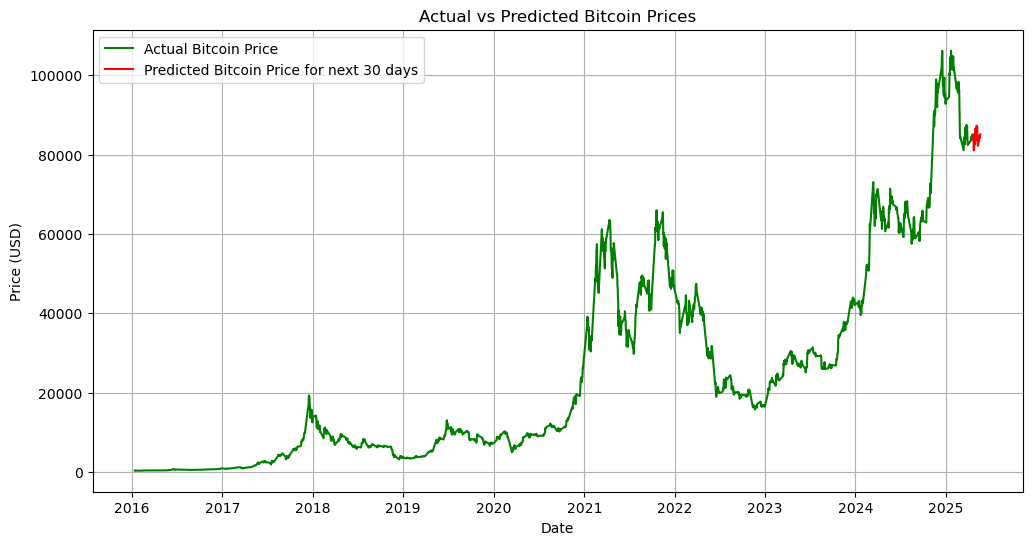

Predicted Bitcoin Prices for the next 30 days:
           Date  Predicted_Price
1644 2025-04-20     84047.410295
1645 2025-04-21     84508.754752
1646 2025-04-22     84037.071529
1647 2025-04-23     81054.961588
1648 2025-04-24     83806.034375
1649 2025-04-25     84068.923463
1650 2025-04-26     82461.659453
1651 2025-04-27     83769.381500
1652 2025-04-28     82728.553637
1653 2025-04-29     86521.277021
1654 2025-04-30     84012.901749
1655 2025-05-01     83873.815196
1656 2025-05-02     83758.165895
1657 2025-05-03     85950.537063
1658 2025-05-04     87288.854670
1659 2025-05-05     87183.908384
1660 2025-05-06     86731.290829
1661 2025-05-07     86898.776688
1662 2025-05-08     84137.764796
1663 2025-05-09     82447.854746
1664 2025-05-10     82195.744365
1665 2025-05-11     82420.093596
1666 2025-05-12     83586.967793
1667 2025-05-13     84352.275048
1668 2025-05-14     83477.755374
1669 2025-05-15     83886.652816
1670 2025-05-16     84727.358095
1671 2025-05-17     84313.106

In [47]:
# Forecast the next 7 days using the trained ARIMA model
future_steps = 30

# Use the most recent data for forecasting the next 'future_steps' days
future_prediction = model_fit.forecast(steps=future_steps, exog=X_test[-future_steps:])

# Generate future dates starting from the last date in the training data
future_dates = pd.date_range(start=bitcoin_df.index[-1], periods=future_steps + 1, freq='D')[1:]

# Create a DataFrame to store the predicted values and corresponding future dates
forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Price': future_prediction
})

# Plot actual and predicted Bitcoin prices
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(bitcoin_df.index, bitcoin_df['Price'], label='Actual Bitcoin Price', color='green')

# Plot predicted values
plt.plot(forecast_df['Date'], forecast_df['Predicted_Price'], label=f'Predicted Bitcoin Price for next {future_steps} days', color='red')

# Add labels and title
plt.title('Actual vs Predicted Bitcoin Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Output the predicted values for the next 7 days
print(f"Predicted Bitcoin Prices for the next {future_steps} days:")
print(forecast_df)

In [48]:
def check_stationarity(df):
    result = adfuller(df)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')

# Check stationarity of 'Price' column
check_stationarity(bitcoin_df['Price'])

ADF Statistic: -0.5583584408601926
p-value: 0.880116474636425


In [49]:
# For evaluation on test data
test_predictions = model_fit.forecast(steps=len(y_test), exog=X_test)

# MAE (Mean Absolute Error)
mae_test = mean_absolute_error(y_test, test_predictions)
print(f"Mean Absolute Error (MAE) on Test Data: {mae_test}")

# RMSE (Root Mean Squared Error)
rmse_test = np.sqrt(mean_squared_error(y_test, test_predictions))
print(f"Root Mean Squared Error (RMSE) on Test Data: {rmse_test}")

Mean Absolute Error (MAE) on Test Data: 1065.2828455354188
Root Mean Squared Error (RMSE) on Test Data: 1863.7597452552154


C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Lokeshsaroj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
